# E5 Advanced geospatial plotting 

In [1]:
import pandas as pd
import os
from keplergl import KeplerGl
from pyproj import CRS
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\mojos\Documents\Career Foundry Course\CF Specialization\NYC_2022-Bike-Share-Analysis\Section 2 - Temp Data Storage File\Prepared Data\chicago_data.csv", index_col = 0)

## Data preprocessing

In [3]:
# Create a value column and group by start and end station 

df['value'] = 1
df_group = df.groupby(['from_station_name', 'to_station_name'])['value'].count().reset_index()

In [4]:
df_group

,from_station_name,to_station_name,value
0,2112 W Peterson Ave,2112 W Peterson Ave,14
1,2112 W Peterson Ave,Ashland Ave & Belle Plaine Ave,1
2,2112 W Peterson Ave,Avondale Ave & Irving Park Rd,1
3,2112 W Peterson Ave,Benson Ave & Church St,2
4,2112 W Peterson Ave,Broadway & Argyle St,2
...,...,...,...
113674,Yates Blvd & 75th St,South Shore Dr & 74th St,2
113675,Yates Blvd & 75th St,Stony Island Ave & 71st St,2
113676,Yates Blvd & 75th St,Stony Island Ave & 75th St,3
113677,Yates Blvd & 75th St,Woodlawn Ave & 55th St,2


In [5]:
print(df_group['value'].sum())
print(df.shape)

3603082
(3603082, 16)


In [6]:
df_group['value'].describe()

count    113679.000000
mean         31.695230
std         104.023444
min           1.000000
25%           2.000000
50%           6.000000
75%          23.000000
max        8858.000000
Name: value, dtype: float64

### Some exploratory analysis into the trips

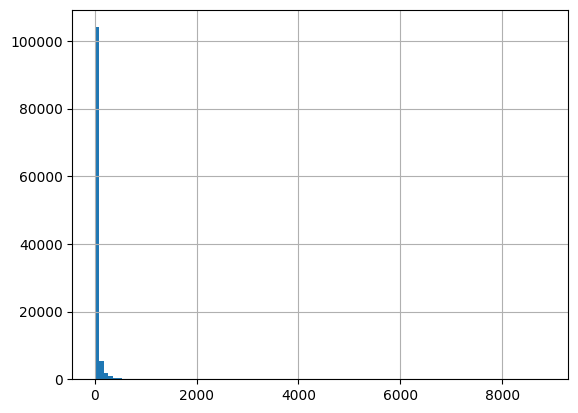

In [7]:
df_group['value'].hist(bins = 100)
plt.show()

[]

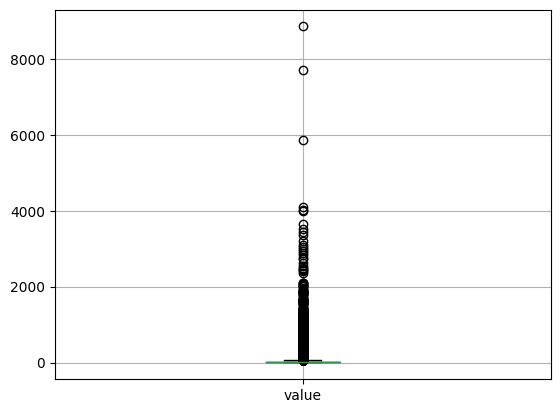

In [8]:
b_plot = df_group.boxplot(column = 'value') 
b_plot.plot()

In [9]:
df_group['value'].sort_index().value_counts()

value
1       23427
2       13274
3        8409
4        6215
5        4777
        ...  
1166        1
592         1
657         1
607         1
612         1
Name: count, Length: 944, dtype: int64

In [10]:
df_group.to_csv('df_groupby_final.csv')

In [11]:
df_group.head()

,from_station_name,to_station_name,value
0,2112 W Peterson Ave,2112 W Peterson Ave,14
1,2112 W Peterson Ave,Ashland Ave & Belle Plaine Ave,1
2,2112 W Peterson Ave,Avondale Ave & Irving Park Rd,1
3,2112 W Peterson Ave,Benson Ave & Church St,2
4,2112 W Peterson Ave,Broadway & Argyle St,2


In [12]:
df_group.rename(columns = {'from_station_name':'start_station_name','to_station_name' : 'end_station_name',
                          'value': 'trips'}, inplace = True)

## Merge data to create latitude and longitude - only for Chicago

#### Import location data - only for Chicago

In [13]:
# Load location data

df_stations = pd.read_csv(r"C:\Users\mojos\Documents\Career Foundry Course\CF Specialization\NYC_2022-Bike-Share-Analysis\Divvy_Bicycle_Stations_20240809.csv", index_col = 0)

# Source: https://data.cityofchicago.org/Transportation/Divvy-Bicycle-Stations/bbyy-e7gq

In [14]:
df_stations.head()

,Station Name,Short Name,Total Docks,Docks in Service,Status,Latitude,Longitude,Location
ID,,,,,,,,
a3ad5c90-a135-11e9-9cda-0a87ae2ba916,Dorchester Ave & 49th St,KA1503000069,15,15,In Service,41.805772,-87.592464,POINT (-87.592464 41.805772)
1571105068000485406,Narragansett & Irving Park,NaN,9,9,In Service,41.952614,-87.785383,POINT (-87.7853829 41.952614)
a3b2af02-a135-11e9-9cda-0a87ae2ba916,MLK Jr Dr & 83rd St,586,11,11,In Service,41.743116,-87.614800,POINT (-87.6148 41.743116)
1594046405283107528,California & 16th St,NaN,9,9,In Service,41.859228,-87.695562,POINT (-87.695562 41.859228)
a3b13836-a135-11e9-9cda-0a87ae2ba916,Kenton Ave & Madison St,537,11,11,In Service,41.880708,-87.741018,POINT (-87.741018 41.880708)


In [15]:
df_stations['start_station_name'] = df_stations['Station Name']

In [16]:
df_stations.head()

,Station Name,Short Name,Total Docks,Docks in Service,Status,Latitude,Longitude,Location,start_station_name
ID,,,,,,,,,
a3ad5c90-a135-11e9-9cda-0a87ae2ba916,Dorchester Ave & 49th St,KA1503000069,15,15,In Service,41.805772,-87.592464,POINT (-87.592464 41.805772),Dorchester Ave & 49th St
1571105068000485406,Narragansett & Irving Park,NaN,9,9,In Service,41.952614,-87.785383,POINT (-87.7853829 41.952614),Narragansett & Irving Park
a3b2af02-a135-11e9-9cda-0a87ae2ba916,MLK Jr Dr & 83rd St,586,11,11,In Service,41.743116,-87.614800,POINT (-87.6148 41.743116),MLK Jr Dr & 83rd St
1594046405283107528,California & 16th St,NaN,9,9,In Service,41.859228,-87.695562,POINT (-87.695562 41.859228),California & 16th St
a3b13836-a135-11e9-9cda-0a87ae2ba916,Kenton Ave & Madison St,537,11,11,In Service,41.880708,-87.741018,POINT (-87.741018 41.880708),Kenton Ave & Madison St


In [17]:
df_stations.rename(columns = {'Station Name': 'end_station_name'}, inplace = True)

In [18]:
df_stations.reset_index(inplace = True)

In [19]:
df_stations = df_stations[['end_station_name', 'start_station_name', 'Latitude', 'Longitude']]

In [20]:
df_stations

,end_station_name,start_station_name,Latitude,Longitude
0,Dorchester Ave & 49th St,Dorchester Ave & 49th St,41.805772,-87.592464
1,Narragansett & Irving Park,Narragansett & Irving Park,41.952614,-87.785383
2,MLK Jr Dr & 83rd St,MLK Jr Dr & 83rd St,41.743116,-87.614800
3,California & 16th St,California & 16th St,41.859228,-87.695562
4,Kenton Ave & Madison St,Kenton Ave & Madison St,41.880708,-87.741018
...,...,...,...,...
994,Oakley Ave & Irving Park Rd,Oakley Ave & Irving Park Rd,41.954341,-87.686080
995,Doty Ave & 111th St,Doty Ave & 111th St,41.695010,-87.598715
996,Eberhart Ave & 131st St,Eberhart Ave & 131st St,41.658413,-87.610711
997,Eberhart Ave & 91st St,Eberhart Ave & 91st St,41.729285,-87.611032


##### _By start station_

In [21]:
df_m = df_group.merge(df_stations, how = 'outer', on = "start_station_name", indicator = 'merge_flag')

In [22]:
df_m['merge_flag'].value_counts(dropna = False)

merge_flag
both          100966
left_only      12713
right_only       457
Name: count, dtype: int64

In [23]:
df_m = df_m[df_m['merge_flag'] =='both']

In [24]:
df_m.shape

(100966, 7)

In [25]:
df_m.head()

,start_station_name,end_station_name_x,trips,end_station_name_y,Latitude,Longitude,merge_flag
0,2112 W Peterson Ave,2112 W Peterson Ave,14.0,2112 W Peterson Ave,41.991178,-87.683593,both
1,2112 W Peterson Ave,Ashland Ave & Belle Plaine Ave,1.0,2112 W Peterson Ave,41.991178,-87.683593,both
2,2112 W Peterson Ave,Avondale Ave & Irving Park Rd,1.0,2112 W Peterson Ave,41.991178,-87.683593,both
3,2112 W Peterson Ave,Benson Ave & Church St,2.0,2112 W Peterson Ave,41.991178,-87.683593,both
4,2112 W Peterson Ave,Broadway & Argyle St,2.0,2112 W Peterson Ave,41.991178,-87.683593,both


In [26]:
df_m.drop(columns = {'end_station_name_y'}, inplace = True)

In [27]:
df_m.rename(columns = {'end_station_name_x' : 'end_station_name'}, inplace = True)

##### _By end station_

In [28]:
df_final = df_m.merge(df_stations, how = 'outer', on = "end_station_name", indicator = 'merge_flag_2')

In [29]:
df_final['merge_flag_2'].value_counts(dropna = False)

merge_flag_2
both          89871
left_only     11095
right_only      459
Name: count, dtype: int64

In [30]:
df_final.head()

,start_station_name_x,end_station_name,trips,Latitude_x,Longitude_x,merge_flag,start_station_name_y,Latitude_y,Longitude_y,merge_flag_2
0,2112 W Peterson Ave,2112 W Peterson Ave,14.0,41.991178,-87.683593,both,2112 W Peterson Ave,41.991178,-87.683593,both
1,Ashland Ave & Belle Plaine Ave,2112 W Peterson Ave,1.0,41.956057,-87.668835,both,2112 W Peterson Ave,41.991178,-87.683593,both
2,Avondale Ave & Irving Park Rd,2112 W Peterson Ave,1.0,41.953393,-87.732002,both,2112 W Peterson Ave,41.991178,-87.683593,both
3,Broadway & Barry Ave,2112 W Peterson Ave,5.0,41.937582,-87.644098,both,2112 W Peterson Ave,41.991178,-87.683593,both
4,Broadway & Berwyn Ave,2112 W Peterson Ave,6.0,41.978361,-87.659789,both,2112 W Peterson Ave,41.991178,-87.683593,both


In [31]:
df_final = df_final[df_final['merge_flag_2'] =='both']

In [32]:
df_final.drop(columns = {'start_station_name_y', 'merge_flag', 'merge_flag_2'}, inplace = True)

In [33]:
df_final.rename(columns = {'start_station_name_x' : 'start_station_name'}, inplace = True)

In [34]:
df_final.head()

,start_station_name,end_station_name,trips,Latitude_x,Longitude_x,Latitude_y,Longitude_y
0,2112 W Peterson Ave,2112 W Peterson Ave,14.0,41.991178,-87.683593,41.991178,-87.683593
1,Ashland Ave & Belle Plaine Ave,2112 W Peterson Ave,1.0,41.956057,-87.668835,41.991178,-87.683593
2,Avondale Ave & Irving Park Rd,2112 W Peterson Ave,1.0,41.953393,-87.732002,41.991178,-87.683593
3,Broadway & Barry Ave,2112 W Peterson Ave,5.0,41.937582,-87.644098,41.991178,-87.683593
4,Broadway & Berwyn Ave,2112 W Peterson Ave,6.0,41.978361,-87.659789,41.991178,-87.683593


In [35]:
import gc # this is garbage collector - speeds up performance
gc.collect()

6

In [36]:
df_final.head()

,start_station_name,end_station_name,trips,Latitude_x,Longitude_x,Latitude_y,Longitude_y
0,2112 W Peterson Ave,2112 W Peterson Ave,14.0,41.991178,-87.683593,41.991178,-87.683593
1,Ashland Ave & Belle Plaine Ave,2112 W Peterson Ave,1.0,41.956057,-87.668835,41.991178,-87.683593
2,Avondale Ave & Irving Park Rd,2112 W Peterson Ave,1.0,41.953393,-87.732002,41.991178,-87.683593
3,Broadway & Barry Ave,2112 W Peterson Ave,5.0,41.937582,-87.644098,41.991178,-87.683593
4,Broadway & Berwyn Ave,2112 W Peterson Ave,6.0,41.978361,-87.659789,41.991178,-87.683593


In [37]:
df_final.rename(columns = {'Latitude_x' : 'start_lat', 'Longitude_x' : 'start_lon', 
       'Latitude_y' : 'end_lat', 'Longitude_y' : 'end_lon',}, inplace = True)

## PLot the map

In [38]:
df_final.to_csv('df_final_locations_for_map.csv')

In [39]:
# Create KeplerGl instance

m = KeplerGl(height = 700, data={"data_1": df_final})
m

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'data_1':                     start_station_name      end_station_name  trips  \
0             …

In [40]:
config = m.config

In [41]:
config

{}

In [42]:
import json
with open("config.json", "w") as outfile:
    json.dump(config, outfile)

In [43]:
m.save_to_html(file_name = 'Divvy Bike Trips Aggregated.html', read_only = False, config = config)

Map saved to Divvy Bike Trips Aggregated.html!
